In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
import math
import scipy as stats

In [2]:
%matplotlib inline

In [3]:
class Relative_Frequency(object):
    
    def __init__(self, dataset):
        self.dataset = dataset
        self.width_of_class_interval = None
        self.data_range = None
        self.number_of_intervals = None

        
    def get_data_range(self, number_of_intervals):
        self.width_of_class_interval = self. get_width_of_class_interval(number_of_intervals)
        self.data_range = np.arange(min(self.dataset), max(self.dataset)+self.width_of_class_interval, self.width_of_class_interval).round(decimals=1)
        return self.data_range
        
        
    def get_custom_data_range(self, start_point, end_point, width_of_class_interval):
        self.data_range = np.arange(start_point, end_point+width_of_class_interval, width_of_class_interval)
        return self.data_range
        
        
    def get_width_of_class_interval(self, number_of_intervals):
        self.number_of_intervals = number_of_intervals
        self.width_of_class_interval = round(((math.ceil(max(self.dataset))-min(self.dataset))/(self.number_of_intervals)), ndigits=1)
        if self.width_of_class_interval < 0.2:
            self.get_width_of_class_interval(number_of_intervals-1)
        else:
            return self.width_of_class_interval
        
        
    def get_custom_width_of_class_interval(self, start_point, end_point, number_of_intervals):
        self.width_of_class_interval = round((end_point - start_point)/(number_of_intervals))
        return self.width_of_class_interval
        
        
    def get_number_of_intervals(self, width_of_class_interval=0.0):
        self.width_of_class_interval = width_of_class_interval
        if self.width_of_class_interval == 0.0:
            return len(self.dataset)
        else:
            return round(((math.ceil(max(self.dataset))-min(self.dataset))/(width_of_class_interval)), ndigits=1)
        
        
    def frequency(self, data_range):
        self.data_range = data_range
        result = []
        for i in range(len(self.data_range)-1):
            if i ==0:
                x1 = self.dataset[self.data_range[i]<=self.dataset]
                x2 = x1[x1<=self.data_range[i+1]]
                result.append(len(x2))
            else:
                x1 = self.dataset[self.data_range[i]<self.dataset]
                x2 = x1[x1<=self.data_range[i+1]]
                result.append(len(x2))
        return result

    
    def open_frequency(self, data_range):
        self.data_range = data_range
        result = []
        for i in range(len(self.data_range)+1):
            if i == 0:
                x1 = self.dataset[self.data_range[i]>self.dataset]
                result.append(len(x1))
            elif i == len(self.data_range):
                x1 = self.dataset[self.data_range[i-1]<self.dataset]
                result.append(len(x1))
            else:
                x1 = self.dataset[self.data_range[i-1]<=self.dataset]
                x2 = x1[x1<=self.data_range[i]]
                result.append(len(x2))
        
        return result
    
    
    def interval(self):#, data_range):
        #self.data_range = data_range
        result = []
        for i in range(len(self.data_range)-1):
            if i == 0:
                result.append(str(round(self.data_range[i], ndigits=1))+'-'+str(round(self.data_range[i+1], ndigits=1)))
            elif i == len(self.data_range)-2:
                result.append(str(round(self.data_range[i], ndigits=1))+'-'+str(round(max(self.dataset), ndigits=1)))
            else:
                result.append(str(round(self.data_range[i]+0.1, ndigits=1))+'-'+str(round(self.data_range[i+1], ndigits=1)))
        
        return result
    
    
    def open_interval(self):#, data_range):
        #self.data_range = data_range
        result = []
        for i in range(len(self.data_range)+1):
            if i == 0:
                result.append('infinity-'+str(round(self.data_range[i], ndigits=1)))
            elif i == len(self.data_range):
                result.append(str(round(max(self.dataset), ndigits=1))+'-infinity')
            else:
                result.append(str(round(self.data_range[i-1]+0.1, ndigits=1))+'-'+str(round(self.data_range[i], ndigits=1)))
        
        return result
    
    
    def classification(self, data_range, close=True):
        if close is True:
            f = self.frequency(data_range)
            result = {
                "Interval": self.interval(),
                "Frequency": f,
                "%": np.array(f)/len(self.dataset),
            }
        else:
            f = self.open_frequency(data_range)
            result = {
            "Interval": self.open_interval(),
            "Frequency": f,
            "%": np.array(f)/len(self.dataset),
        }
            
        return pd.DataFrame(result)
    
    
    def evaluation(self, data_range, close=True):
        rep = self.classification(data_range, close) # change
        fig = plt.figure(figsize=(15.0, 6.0))
        axes1 = fig.add_axes([0.1,0.1,0.8,0.8])
        axes1.plot(rep["Interval"], rep["Frequency"])
        #axes1.bar(np.arange(0,len(rep['Interval']),1), height=rep['Frequency'])
        #sns.barplot(rep.index.to_list(), rep['Frequency'])
        #print(" ")
        #print("Frequency Distribution Plot")
        #sns.distplot(rep['Frequency'])
        
        
    def commulative_evaluation(self, data_range, more_than=True):
        self.data_range = data_range
        data_frequency = np.array(self.frequency(self.data_range))
        #more_than 
        if more_than is True:
            total = data_frequency.sum()
            commulative_frequency_distribution = [total]
            for i in data_frequency:
                total -= i
                commulative_frequency_distribution.append(total)
        # less than
        else:
            start_total = 0
            commulative_frequency_distribution = [start_total]
            for i in data_frequency:
                start_total += i
                commulative_frequency_distribution.append(start_total)

        # presentation
        fig = plt.figure(figsize=(15.0, 6.0))
        axes1 = fig.add_axes([0.1,0.1,0.8,0.8])
        axes1.plot(data_range, commulative_frequency_distribution)

In [4]:
class Measure_of_Central_Tendency(Relative_Frequency):
    
    def __init__(self, dataset):
        relative_frequency.__init__(self, dataset)
        self.data_range_mid_point = None
        self.weights = None
        
    def get_data_range_mid_point(self, data_range):
        """
        if class are given in a manner like
        [1-3,4-6,7-9,10-12,13-15,16-18,19-21,22-24]
        
        then, our datarange is
        [1,4,7,10,13,16,19,22,25]
        """
        self.data_range_mid_point = [round((data_range[i]+data_range[i+1])/2) for i in range(len(data_range)-1)]
        return np.array(self.data_range_mid_point)
    
    def arithmetic_mean_by_frequency_distribution(self, data_range):
        x = self.get_data_range_mid_point(data_range)
        f = np.array(self.frequency(data_range))
        sum_fx = (f*x).sum()
        print("fx: ", sum_fx)
        sum_f = f.sum()
        print("f: ", sum_f)
        
        return sum_fx/sum_f
        
        
    def arithmetic_mean_by_raw_dataset(self):
        return self.dataset.mean()
    
    
    def weighted_mean(self, weights):
        self.weights = weights
        return (self.dataset*self.weights).sum()/self.weights.sum()
    
    
    def geometric_mean(self, change_factors, increase=True):
        """
        if direct % is given then, first multiply the array with 0.01
        """
        if increase is True:
            change_factors = change_factors + 1
        
        product_change_factors = change_factors.cumprod()
                
        return (product_change_factors)**(1/len(change_factors)) - 1
    
    
    
    def get_change_factor(self, increase=True):
        change_factors = []
        for i in range(len(self.dataset)-1):
            change_factors.append(self.dataset[i+1]/self.dataset[i])
            
        if increase is True:
            return np.array(change_factors) - 1
        else:
            return np.array(change_factors)
        
        
    def estimate_percentage_change(self, geometric_mean, time):
        return (1 + geometric_mean)**(time) - 1
        
            
    def median_by_raw_data(self):     
        return np.median(self.dataset)
        
        
    def median_by_frequency_distribution(self):
        f = np.array(self.frequency(self.data_range))
        cum_f = f.cumsum() # Cumulative sum of frequency
        n = np.array(f).sum()
        center_elemnt = (n+1)/2
        if n%2 == 0:
            center1,center2 = math.floor(center_elemnt), math.ceil(center_elemnt)
            class_num = len(cum_f[cum_f<center_elemnt]) # Class index number of which median belong
            fnum = cum_f[class_num] # frequency num of which median belong
            data_range_lower_num, data_range_upper_num = self.data_range[class_num], self.data_range[class_num+1]
            step_width = (data_range_upper_num - data_range_lower_num)/fnum
            center1_item = (step_width * (center1 - 1)) + data_range_lower_num
            center2_item = (step_width * (center2 - 1)) + data_range_lower_num
            median = (center1_item + center2_item)/2
    
        else:
            center = center_elemnt
            class_num = len(cum_f[cum_f<center_elemnt]) # Class index number of which median belong
            fnum = cum_f[class_num] # frequency num of which median belong
            data_range_lower_num, data_range_upper_num = self.data_range[class_num], self.data_range[class_num+1]
            step_width = (data_range_upper_num - data_range_lower_num)/fnum
            median = (step_width * (center - 1)) + data_range_lower_num
            
        return median
    
    
    def mode_by_raw_data(self):
        """
        if dataset takes smaller value having larger number of repeats
        """
        unique_data_set = np.unique(self.dataset, return_counts=True)
        return unique_data_set[0][unique_data_set[1].tolist().index(unique_data_set[1].max())], unique_data_set[1].max()
        
    
    def mode_by_frequency_distribution(self):
        """
        if frequency take the larger value
        """
        f = np.array(self.frequency(self.data_range))
        cum_f = f.cumsum() # Cumulative sum of frequency
        n = np.array(f).sum()
        center_elemnt = (n+1)/2
       
        class_num = len(cum_f[cum_f<center_elemnt]) # Class index number of which median belong
        fnum = cum_f[class_num] # frequency num of which median belong
        data_range_lower_num, data_range_upper_num = self.data_range[class_num], self.data_range[class_num+1]
        
        data_range_width = data_range_upper_num - data_range_lower_num
        d1 = f[class_num] - f[class_num+1]
        d2 = f[class_num] - f[class_num-1]
        mode = data_range_lower_num + ((d1/(d1+d2))*data_range_width)
        
        return mode
            

In [5]:
class Measure_of_Dispersion(object):
   

    def __init__(self, dataset):
        self.dataset = dataset
        
        
    def get_dataset(self):
        return self.dataset
    
    
    def set_dataset(self, new_dataset):
        self.dataset = new_dataset
    #==============================
        # Range 
    #==============================

    
    def get_range(self):
        return max(self.dataset)-min(self.dataset)
    
    
    def percentile(self, fraction):
        return sorted(self.dataset)[math.floor(len(self.dataset)*fraction) - 1]
    
    
    def interfractile_range(self, lower_fractile, upper_fractile):
        return self.percentile(upper_fractile) - self.percentile(lower_fractile)
    
    
    def interquartile_range(self):
        return self.interfractile_range(0.25, 0.75)
        
    
    #==============================
        # Average Deviation Measure
    #==============================

    
    def population_variance(self):
        return ((self.dataset**2).sum() / len(self.dataset)) - (self.dataset.mean())**2
    
    
    def population_standard_daviation(self):
        return (self.population_variance())**(1/2)
    
    
    def standard_score(self, x):
        return (x - self.dataset.mean()) / self.population_standard_daviation()
    
    
    def population_mean_by_frequency_distribution(self, frequency):
        return ((self.dataset * frequency).sum())/(frequency.sum())
    
    
    def population_variance_by_frequency_distribution(self, frequency):
        return ((frequency * (self.dataset**2)).sum() / (frequency.sum())) - (self.population_mean_by_frequency_distribution(frequency))**2
        
        
    def population_standard_daviation_by_frequency_distribution(self, frequency):
        return (self.population_variance_by_frequency_distribution(frequency))**(1/2)
    
    
    def sample_variance(self):
        return ((self.dataset - self.dataset.mean())**2).sum() / (len(self.dataset) - 1)
    
    
    def sample_standard_deviation(self):
        return (self.sample_variance())**(1/2)
    
    
    def sample_standard_score(self, x):
        return (x - self.dataset.mean()) / self.sample_standard_deviation()
    
    
    #==============================
        # Relative Dispersion
    #==============================

    
    def coefficient_of_variation(self, sigma, mu):
        """
        lesser is better
        """
        return (sigma/mu)*100

In [6]:
class Probability(object):
    
    def __init__(self):
        pass
    
    
    def get_classical_probability(self, A, N):
        """
        A: Number of favourable outcomes
        N: Total number of possible outcomes
        """
        return round(A/N, 2)
    
    
    #====================================
    # UNDER STATISTICAL INDEPENDENCE 
    #====================================
    def marginal_probability(self, probabilities_of_events_happening, probility_of_events_happening_together=0.0):
        """
        probabilities_of_events_happening: numpy array or list
        """
        return round(np.array(probabilities_of_events_happening).sum() - probility_of_events_happening_together, 2)
    
    
    def joint_probability(self, probabilities_of_events_happening):
        return round(np.array(probabilities_of_events_happening).prod(),2)
    
    
    def conditional_probabilities(self, probability_of_required_event_happening):
        """
        as events are independents 
        """
        return probability_of_required_event_happening
    
    
    #====================================
    # UNDER STATISTICAL DEPENDENCE 
    #====================================
    def conditional_probabilities_under_statistical_dependence(self, probability_of_given_event_happening, probability_of_given_and_required_event_happening_together):
        return round(probability_of_given_and_required_event_happening_together/probability_of_given_event_happening, 2)
    
    
    def joint_probabilities_under_statistical_dependence(self, probability_of_given_event_happening, probability_of_conditional_event_happening_together):
        return round(probability_of_conditional_event_happening_together*probability_of_given_event_happening, 2)
    
    
    def marginal_probability(self, probabilities_of_all_joint_events_happening):
        """
        probabilities_of_events_happening: numpy array or list
        """
        return round(np.array(probabilities_of_events_happening).sum(), 2)
    
    
    #====================================
    # PRIOR ESTIMATES OF PROBABILITIES
    #====================================
    def bayes_therorem_probability(self, probabilities_of_events, conditional_probabilities):
        """
        return: tuple of probability_of_condition & posterior_probabilities of events
        """
        probabilities_of_conditions_and_event = np.array(probabilities_of_events) * np.array(conditional_probabilities)
        probability_of_condition = probabilities_of_conditions_and_event.sum()
        posterior_probabilities = probabilities_of_conditions_and_event/probability_of_condition
        
        return probability_of_condition, posterior_probabilities

In [7]:
class Probability_Distribution(object):
    """
    APPLICATIONS OF DISTRIBUTIONS
    Binomial Distribution: applied when number of trials is fixed before
                        the experiments begins, and each trial is indipendent
                        and can result in only two mutually exclusive outcome
                        (success/failure, either/or, yes/no)
    Possion Distribution: when each trial is independent. But although the
                        probabilities approach 0 after the first few values,
                        the number of possible values is finite. The result
                        are not limited to two mutually exclusive outcomes.
    Normal Distribution: where distribution is continues.
    """
    
    def __init__(self):
        self.X = None
        self.probabilities = None
        
        
    def get_random_variable(self):
        return self.X
    
    
    def set_random_variable(self, random_variable):
        self.X = random_variable
        
        
    def get_probabilities(self):
        return self.probabilities
    
    
    def set_probabilities(self, probabilities):
        self.probabilities = probabilities
        
        
    def possible_value_of_discrete_random_variable(self):
        """
        weighted average of the outcomes expected in future.
        As condition cahnge over time, the value would recompute
        and use this new value as the basis of future decision
        making.
        """
        return (self.X * self.probabilities).sum()
        
        
        """
        check the need of init variables
        """
        
    def conditional_table(self, obs, opp):
        """
        obs: obsolescence losses: caused by stocking too much than demand
        opp: opportunity losses: caused by shortage of stock when demand is high.
        
        optimal stock action: is the one that will minimize expected losses.
        """
        result_table = np.zeros((len(self.X),len(self.X)))
        for i in range(len(self.X)):
            for j in range(len(self.X)):
                if i>j:
                    result_table[i,j] = (i-j)*opp
                elif i<j:
                    result_table[i,j] = (j-i)*obs
                    
        return result_table
        
        
    def expected_value(self, obs, opp):
        conditions = np.transpose(self.conditional_table(obs, opp))
        expectations = []
        for condition in conditions:
            expectations.append((condition * self.probabilities).sum())
        
        return expectations
    
    
    def probability_distribution_graph(self):
        plt.plot(self.X, self.probabilities)
        
    
    def binomial_distribution(self, p, n, r):
        """
        use for discrete probailities
        p: characteristic probability or probability of success
        n: number of trials undertaken
        r: number of success desired
        """
        return (math.factorial(n)/(math.factorial(r)*(math.factorial(n-r))))*(p**r)*((1-p)**(n-r))
    
    
    def binomial_distribution_evaluation(self, p, n):
        binomial_probability_distribution = []
        range_of_success_desired = np.arange(0, n+1)
        for i in range_of_success_desired:
            binomial_probability_distribution.append(self.binomial_distribution(p, n, i))
            
        plt.plot(range_of_success_desired, binomial_probability_distribution)
        
        result = {
            "r": range_of_success_desired,
            "Binomial Probability": binomial_probability_distribution,
        }
        
        return pd.DataFrame(result)
        
    def binomial_distribution_mean(self, n, p):
        return n*p
    
    
    def binomial_distribution_standard_deviation(self, n, p):
        return math.sqrt(n*p*(1-p))
    
        
    def poisson_distribution(self, mean, x):
        """
        use for discrete probailities
        mean: the mean number of occurrences per interval of time
        x: probability of exactly x occurrences
        """
        return ((mean**x)*((math.e)**(-mean)))/(math.factorial(x))
    
    
    def poisson_distribution_evaluation(self, mean):
        """
        we will calulate this on random variable
        """
        poisson_probability_distribution = []
        for i in self.X:
            poisson_probability_distribution.append(self.poisson_distribution(mean,i))
        
        plt.plot(self.X, poisson_probability_distribution)
        
        result = {
            "x": self.X,
            "P(x)": poisson_probability_distribution,
        }
        
        return pd.DataFrame(result)
    
    
    def standard_normal_table(self, file):
        df_file = pd.read_csv(file)
        df_file.index = df_file['z']
        df_file.drop('z', axis=1, inplace=True)

        return df_file
    
    
    def number_of_standard_deviations(self, x, mu, sigma):
        """
        To get number of standard deviations from x to the mean 
        of this ditribution
        x = value of random variable with which concerned
        mu = mean if the distribution of this random variable
        sigma = standard deviation of thistribution
        """
        return round((x - mu)/sigma, 2)
    
    
    def probability_of_num_standard_deviations(self, file, z):
        """
        file = csv file to see standard normal distribution
        z = number of standard deviations from x to the mean 
        of this ditribution
        """
        z_str = str(round(z, 2))
        print('z string:', z)
        if len(z_str)>3:
            first_num, last_num = float(z_str[:-1]), int(z_str[-1])
        else:
            first_num, last_num = float(z_str), 0
        print("first, last:", first_num, last_num)
        
        normal_table = self.standard_normal_table(file)
        probability_value = normal_table.loc[first_num][last_num]
    
        return probability_value
    
    
    def normal_distribution(self, mu, sigma, X1=-math.inf, X2=math.inf):
        """
        Also called Gausssian Distribution
        use for continues probabilities
        
        NOTE: 1. while taking random variable(rv) if rv's are inclusive
        then x1-0.5, x2+0.5, and if not inclusive then x1+0.5 & x2-0.5
        
        X1 = Smaller value of random variable with which concerned
        X2 = Larger value of random variable with which concerned
        mu = mean if the distribution of this random variable
        sigma = standard deviation of thistribution
        """
        z1 = self.number_of_standard_deviations(X1, mu, sigma)
        z2 = self.number_of_standard_deviations(X2, mu, sigma)
        print(z1, z2)
        
        if abs(z1) == abs(z2) == math.inf:
            return None
        
        elif abs(z1) == math.inf and abs(z2) != math.inf:
            if z2 > 0:
                print("a1")
                return self.probability_of_num_standard_deviations('cumulative.csv', z2)
            else:
                print("a2")
                return self.probability_of_num_standard_deviations('complementary_cumulative.csv', abs(z2))
        
        elif abs(z1) != math.inf and abs(z2) == math.inf:
            if z1 > 0:
                print("a3")
                return self.probability_of_num_standard_deviations('complementary_cumulative.csv', z1)
            else:
                print("a4")
                return self.probability_of_num_standard_deviations('cumulative.csv', abs(z1))
        
        else:
            if abs(z1) == 0 and z2 > 0:
                print("a5")
                return self.probability_of_num_standard_deviations('cumulative_from_mean_0toZ.csv', z2)
            
            elif z1>0 and z2>0:
                print("a6")
                prob1 = self.probability_of_num_standard_deviations('cumulative.csv', z2)
                prob2 = self.probability_of_num_standard_deviations('cumulative.csv', z1)
                print("probabilities 1 & 2", prob1, prob2)
                return prob1 - prob2
            
            elif (z1<0 and z2>0) or (z1>0 and z2<0):
                print("a7")
                #prob1 = self.probability_of_num_standard_deviations('cumulative.csv', abs(z2))
                #prob2 = self.probability_of_num_standard_deviations('cumulative.csv', abs(z1))
                
                prob1 = self.probability_of_num_standard_deviations('cumulative_from_mean_0toZ.csv', abs(z2))
                prob2 = self.probability_of_num_standard_deviations('cumulative_from_mean_0toZ.csv', abs(z1))
                print("probabilities 1 & 2", prob1, prob2)
                return prob1 + prob2
            
            elif z1<0 and z2<0:
                print("a8")
                prob1 = self.probability_of_num_standard_deviations('complementary_cumulative.csv', abs(z2))
                prob2 = self.probability_of_num_standard_deviations('complementary_cumulative.csv', abs(z1))
                print("probabilities 1 & 2", prob1, prob2)
                return prob1 - prob2
    
    
    def __str__(self):
        return "Random Variables(X): "+str(self.X)+"\n \nProbabilities: "+str(self.probabilities)

In [8]:
prd = Probability_Distribution()

In [12]:
"""
x = np.array([[70,10,40,0,10],
             [30,15,20,0,0],
             [0,10,30,30,10],
             [20,7,10,20,0],
            [40,10,0,30,10]])*100

"""
x = np.array([15,20,25,30])*1000

#p = np.array([10,20,25,30,15])*0.01
#lossing
c1 = np.array([[25,35,15],
               [10,10,15],
               [5,10,10]])*0.01
#gaining
c2 = np.array([[10,15,15],
               [30,35,15],
               [35,40,10]])*0.01


p = np.array([10,30,40,20])*0.01
#p2 = np.array()*0.01
#p3 = np.array()*0.01
x4 = np.array([64,68,58,57,59])

f = np.array([18,90,44,21,9,9,4,5])

In [13]:
prd.set_probabilities(p)
prd.set_random_variable(x)
prd.expected_value(0.25, 0.70)

[1.19, 0.585, 0.265, 0.325]

In [11]:
prd.set_probabilities(p)

prob = []
for i in x:
    prd.set_random_variable(i)
    prob.append(prd.possible_value_of_discrete_random_variable())

prob

[680.0, 630.0]

In [25]:
n = 10
p =0.4

mu = prd.binomial_distribution_mean(n,p)
sigma = prd.binomial_distribution_standard_deviation(n,p)
"""
mu = []
sigma = []

for i in range(len(n)):
    mu.append(prd.binomial_distribution_mean(n[i], p[i]))
    sigma.append(prd.binomial_distribution_standard_deviation(n[i], p[i]))
"""

    
x1 = np.array([5.5,3,2])
x2 = np.array([6.5, math.inf,6])

bin_prob = []
"""
for j in range(len(mu)):
    for k in range(len(x1[0])):
        try:
            prob = prd.normal_distribution(mu[j], sigma[j], x1[j][k], x2[j][k])
        except:
            prob = 'Can not be determined'
        bin_prob.append(prob)
        print("---------------------")
    
"""
#for j in range(len(mu)):
for k in range(len(x1)):
    try:
        prob = prd.normal_distribution(mu, sigma, x1[k], x2[k])
    except:
        prob = 'Can not be determined'
    bin_prob.append(prob)
    print("---------------------")
    
bin_prob

0.97 1.61
a6
z string: 1.61
first, last: 1.6 1
z string: 0.97
first, last: 0.9 7
probabilities 1 & 2 0.9463 0.8339799999999999
---------------------
-0.65 inf
a4
z string: 0.65
first, last: 0.6 5
---------------------
-1.29 1.29
a7
z string: 1.29
first, last: 1.2 9
z string: 1.29
first, last: 1.2 9
probabilities 1 & 2 0.40147 0.40147
---------------------


[0.11232000000000009, 0.74215, 0.80294]

In [44]:
mu = np.array([])
sigma = 25
x1 = np.array([-math.inf, -math.inf])
x2 = np.array([4,3])*82

prediction = []
for i in range(2):
    prediction.append(prd.normal_distribution(mu, sigma, x1[i], x2[i]))
    
prediction

-inf 0.32
a1
z string: 0.32
first, last: 0.3 2
-inf -2.96
a2
z string: 2.96
first, last: 2.9 6


[0.62552, 0.0015400000000000001]

In [17]:
n = 4
p = 0.11
r = np.arange(0,5)

prob = []
for i in range(len(r)):
    prob.append(prd.binomial_distribution(p, n, r[i]))
    
prob

[0.62742241, 0.31018636000000005, 0.05750646, 0.00473836, 0.00014641]

In [24]:
n = np.array([1460, 1327])
p = np.array([80,77])*0.01

result = []
for i in range(len(n)):
    res = []
    res.append(prd.binomial_distribution_mean(n[i], p[i]))
    res.append(prd.binomial_distribution_standard_deviation(n[i], p[i]))
    result.append(res)
    
result

[[1168.0, 15.283978539634239], [1021.7900000000001, 15.330091323928896]]

In [23]:
prd.binomial_distribution(p,n,2)

0.2305176507937677

In [22]:
prd.poisson_distribution(n*p, 2)

0.2238318725470235

In [48]:
prd.poisson_distribution(mu, 1)

0.0

In [44]:
prd.get_random_variable()

array([15000,  8500, 10000,  7700, 11000])

In [36]:
prd.normal_distribution(5.07, 0.07, 5.1-0.05, 5.1+0.05)

-0.29 1.14
a7
z string: 1.14
first, last: 1.1 4
z string: 0.29
first, last: 0.2 9
probabilities 1 & 2 0.37285999999999997 0.11409000000000001


0.48695

In [73]:
0.15866/0.5

0.31732

In [62]:
prd.probability_of_num_standard_deviations('cumulative.csv', 4.3)

z string: 4.3
first, last: 4.3 0


KeyError: 4.3

In [88]:
prd.poisson_distribution(50*0.04,0)

0.1353352832366127

In [93]:
n = 1000
p = 0.005
m = n*p

r = np.array([0, 10,15])
for i in r:
    c = prd.poisson_distribution(m,i)
    print(round(c,6))

0.006738
0.018133
0.000157


In [81]:
print(prd)

Random Variables(X): [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
 
Probabilities: None


In [77]:
rng = np.arange(-1,10)
rng

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9])

In [14]:
pd.expected_value(7,10)

[26.3, 17.659999999999997, 11.57, 9.219999999999999, 11.120000000000001, 16.59]

In [79]:
r.classification(rng)

,Interval,Frequency,%
0,-1-0,2,0.166667
1,0.1-1,1,0.083333
2,1.1-2,2,0.166667
3,2.1-3,1,0.083333
4,3.1-4,3,0.250000
5,4.1-5,1,0.083333
6,5.1-6,1,0.083333
7,6.1-7,1,0.083333
8,7.1-8,0,0.000000
9,8-7,0,0.000000


In [28]:
prd.binomial_distribution(0.3,15,0)

0.004747561509942996

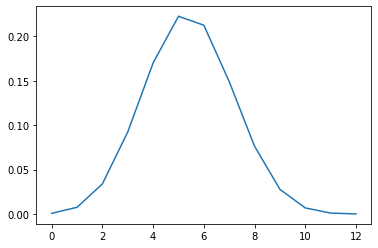

In [39]:
pd.binomial_distribution_evaluation(0.45, 12)

In [33]:
c = []
for i in range(5):
    #c.append(prd.binomial_distribution(0.3, 15, i)) 
    c.append(prd.poisson_distribution(5,i))

print("c: ", c)
print("bd: ",np.array(c).sum())

c:  [0.006737946999085469, 0.033689734995427344, 0.08422433748856836, 0.14037389581428059, 0.17546736976785074]
bd:  0.44049328506521246


In [20]:
n = np.array([15,8,72,29,642])
p = np.array([20,42,6,49,21])*0.01

mean = []
stnd = []
for i in range(len(n)):
    mean.append(prd.binomial_distribution_mean(n[i], p[i]))
    stnd.append(prd.binomial_distribution_standard_deviation(n[i], p[i]))
    
result = {
    "n": n,
    "p": p,
    "mean": mean,
    "standard deviation": stnd,
}

pd.DataFrame(result)

,n,p,mean,standard deviation
0,15,0.20,3.00,1.549193
1,8,0.42,3.36,1.395994
2,72,0.06,4.32,2.015143
3,29,0.49,14.21,2.692044
4,642,0.21,134.82,10.320262


In [52]:
n = 10
p = np.array([0.3, 1-0.55, 0.15, 1-0.3])
r = np.array([4,10,2,2])

prob = []
for i in range(4):
    prob.append(prd.binomial_distribution(p[i], 10, r[i]))
    
result = {
    "p": p,
    "r": r,
    "probability": prob,
}

pd.DataFrame(result)

,p,r,probability
0,0.30,4,0.200121
1,0.45,10,0.000341
2,0.15,2,0.275897
3,0.70,2,0.001447


In [50]:
p

array([0.3 , 0.45, 0.15, 0.7 ])

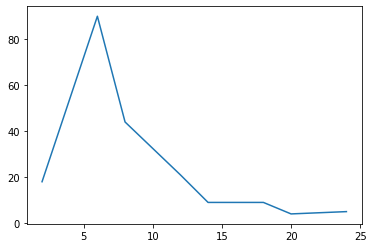

In [82]:
plt.plot(m,f)

In [45]:
a = np.array([1,2,3])
b = np.array([[3,2,1],[4,3,2],[5,4,3]])

In [46]:
a.dot(b)

array([26, 20, 14])

In [ ]:
np.tr

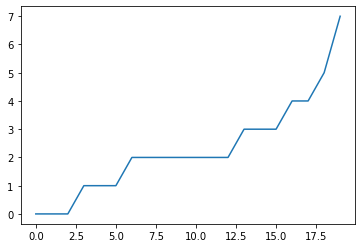

In [120]:
plt.plot(np.arange(0,len(xr.dataset),1), sorted(xr.dataset))

In [54]:
xrc = measure_of_central_tendency(xc)
xrd = measure_of_central_tendency(xd)

In [30]:
math.e

2.718281828459045

In [33]:
xr.arithmetic_mean_by_frequency_distribution(dr)

fx:  1330.0
f:  20


66.5

In [60]:
xrd.weighted_mean(w)

4.3293333333333335

In [52]:
n1 = xr.get_custom_width_of_class_interval(1,10,3)
datarange1 = xr.get_custom_data_range(1,10,n1)
n2 = xr.get_custom_width_of_class_interval(1,10,9)
datarange2 = xr.get_custom_data_range(1,10,n2)

In [85]:
#datarange1 = xr.get_data_range(n)
#datarange2 = xr.get_data_range(8)
#datarange3 = xr.get_data_range(9)

In [67]:
xr.get_number_of_intervals()

15

In [36]:
print("*********datarange1********")
#print(xr.classification(datarange))
print(xr.classification(datarange1))
print("*********datarange2********")
print(xr.classification(datarange2))
print("*********datarange3********")
#print(xr.classification(datarange3))

*********datarange1********
  Interval  Frequency         %
0      1-4         18  0.642857
1    4.1-7          8  0.285714
2      7-9          2  0.071429
*********datarange2********
  Interval  Frequency         %
0      1-2         13  0.464286
1    2.1-3          4  0.142857
2    3.1-4          1  0.035714
3    4.1-5          4  0.142857
4    5.1-6          2  0.071429
5    6.1-7          2  0.071429
6    7.1-8          1  0.035714
7    8.1-9          1  0.035714
8      9-9          0  0.000000
*********datarange3********


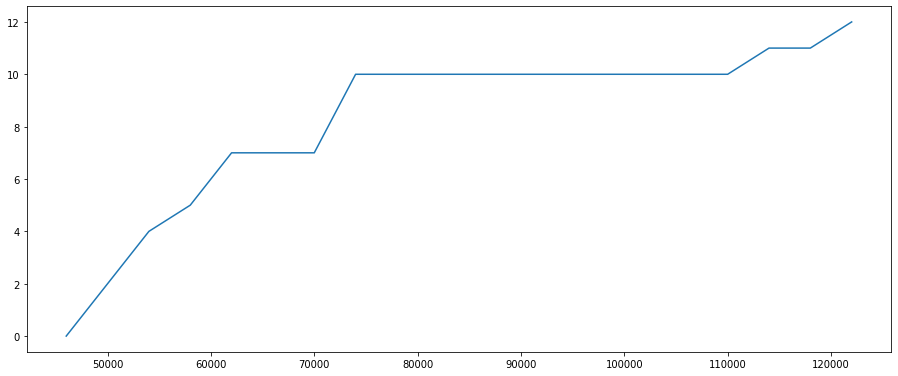

In [64]:
xr.commulative_evaluation(dr, more_than=False)

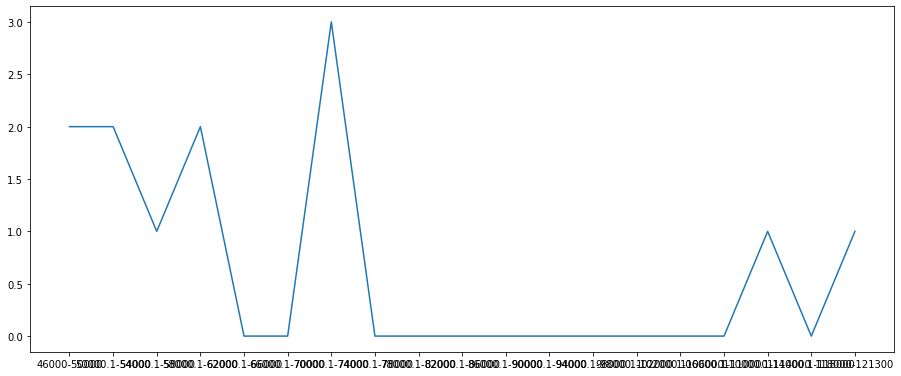

In [63]:
xr.evaluation(dr)

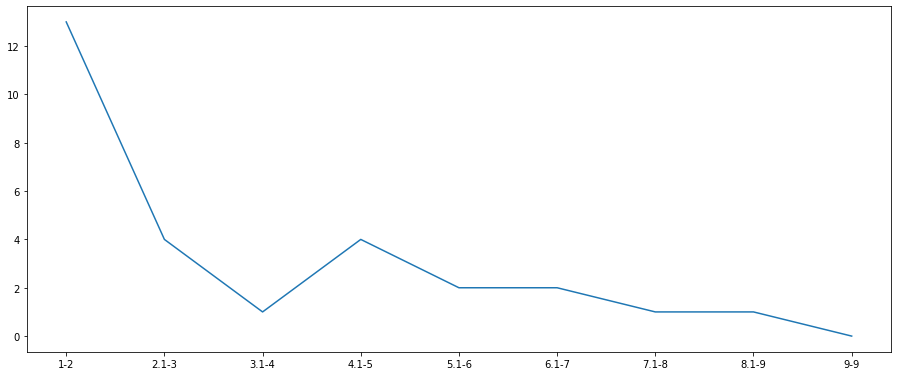

In [39]:
xr.evaluation(datarange2)

In [28]:
xp = xr.classification(datarange2)

In [29]:
xp.head()

,Interval,Frequency,%
0,5.0-7.0,15,0.375
1,7.1-9.0,11,0.275
2,9.1-11.0,8,0.200
3,11.1-13.0,3,0.075
4,13.0-15,3,0.075


(array([1., 0., 2., 3., 3., 2., 3., 3., 2., 1.]),
 array([2000., 2700., 3400., 4100., 4800., 5500., 6200., 6900., 7600.,
        8300., 9000.]),
 <a list of 10 Patch objects>)

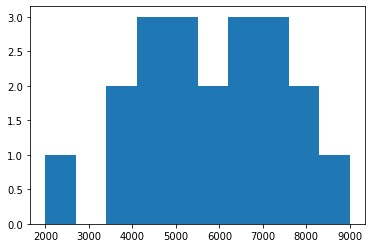

In [58]:
sns.

In [38]:
datarange2

array([ 5.,  7.,  9., 11., 13., 15.])

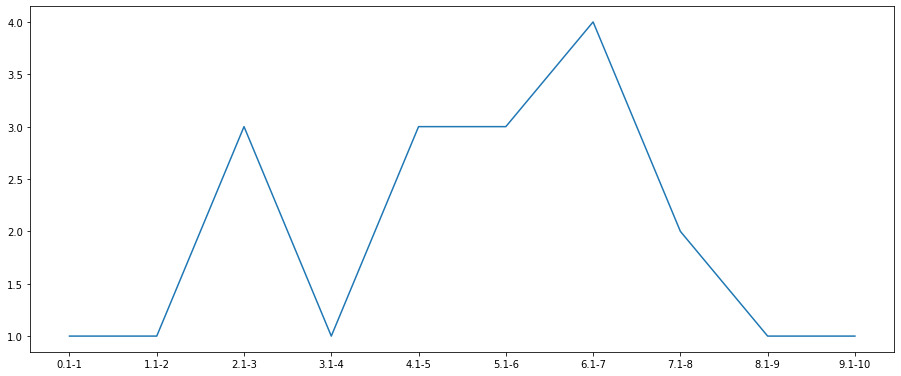

In [50]:
xa.evaluation(data_range)

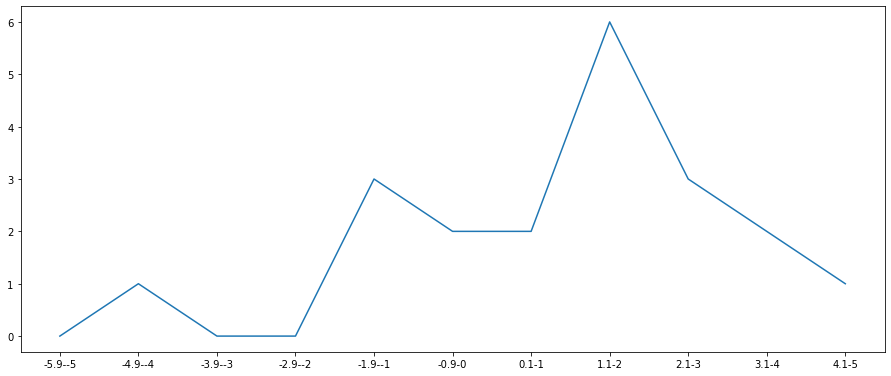

In [61]:
xsubs.evaluation(subs_datarange)

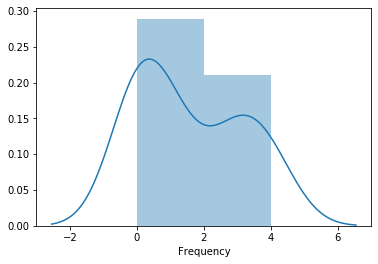

In [136]:
sns.distplot(xp['Frequency'])

In [8]:
x1 = np.random.randint(10, 380, 100)
y1 = np.random.randint(0,24, 100)
x3 = np.arange(1, 20, 0.233797)

In [12]:
x3.round(decimals=2)

array([ 1.  ,  1.23,  1.47,  1.7 ,  1.94,  2.17,  2.4 ,  2.64,  2.87,
        3.1 ,  3.34,  3.57,  3.81,  4.04,  4.27,  4.51,  4.74,  4.97,
        5.21,  5.44,  5.68,  5.91,  6.14,  6.38,  6.61,  6.84,  7.08,
        7.31,  7.55,  7.78,  8.01,  8.25,  8.48,  8.72,  8.95,  9.18,
        9.42,  9.65,  9.88, 10.12, 10.35, 10.59, 10.82, 11.05, 11.29,
       11.52, 11.75, 11.99, 12.22, 12.46, 12.69, 12.92, 13.16, 13.39,
       13.63, 13.86, 14.09, 14.33, 14.56, 14.79, 15.03, 15.26, 15.5 ,
       15.73, 15.96, 16.2 , 16.43, 16.66, 16.9 , 17.13, 17.37, 17.6 ,
       17.83, 18.07, 18.3 , 18.53, 18.77, 19.  , 19.24, 19.47, 19.7 ,
       19.94])

In [23]:
p1 = pd.DataFrame({'channels':x1, 'hours spent':y1,})
p1.sort_values(by=['channels'], inplace=True)

In [25]:
p1.head()

,channels,hours spent
91525,10,17
28925,10,2
75160,10,7
7165,10,19
88324,10,16


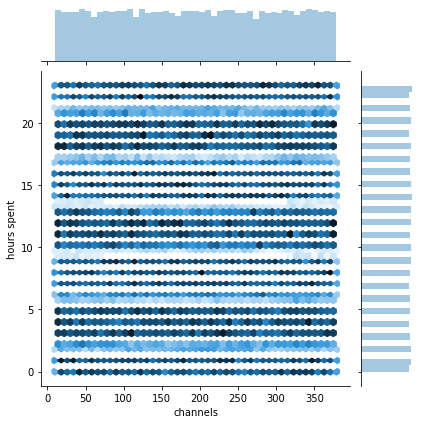

In [32]:
sns.jointplot(x=p1['channels'], y=p1['hours spent'], data=p1, kind='hex')

In [47]:
x.max()

9.999802565159936

In [48]:
x.min()

0.0005800736843142307

In [22]:
len(x[x<475])

24924

In [65]:
len(x[x>6.0])/10000

0.4119

In [38]:
x1 = x[x>=550]
x2 = x1[x1<=650]
len(x2)

14363

In [84]:
y = x[x==50]

In [85]:
len(y)

1563

In [21]:
len(y)/len(x)

0.7496

In [22]:
z = np.arange(35,99)

In [49]:
x1 = np.arange(0.0,10.1, 1.0)

In [51]:
r1 = []
for i in range(len(x1)-1):
    x2 = x[x1[i]<x]
    x3 = x2[x2<=x1[i+1]]
    r1.append(len(x3))

In [93]:
r1 = []
for i in x1:
    r1.append(len(x[x==i]))

In [50]:
x1

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [52]:
np.array(r1).sum()

10000

In [59]:
interval = []
for i in range(len(x1)-1):
    interval.append(str(x1[i])+' - '+str(x1[i+1]))

In [55]:
r2=np.array(r1)/10000

In [60]:
dat = {
    'Interval': interval,
    'Person': r1,
    '%': r2,
}

In [61]:
p1 = pd.DataFrame(dat)

In [62]:
p1

,Interval,Person,%
0,0.0 - 1.0,961,0.0961
1,1.0 - 2.0,1023,0.1023
2,2.0 - 3.0,959,0.0959
3,3.0 - 4.0,958,0.0958
4,4.0 - 5.0,991,0.0991
5,5.0 - 6.0,989,0.0989
6,6.0 - 7.0,1041,0.1041
7,7.0 - 8.0,1006,0.1006
8,8.0 - 9.0,1045,0.1045
9,9.0 - 10.0,1027,0.1027


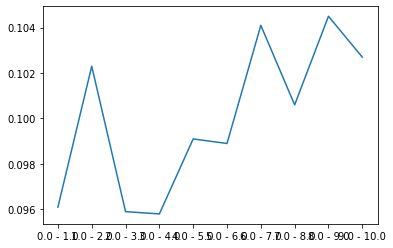

In [63]:
plt.plot(p1['Interval'].to_list(), p1['%'].to_list())

In [78]:
f = open('amit.txt')

In [79]:
x = []
for i in f:
    j = i.split()
    x.append(j)
    
x

[['z', '+0', '+1', '+2', '+3', '+4', '+5', '+6', '+7', '+8', '+9'],
 ['0',
  '5.00000',
  'E',
  '-1',
  '1.58655',
  'E',
  '-1',
  '2.27501',
  'E',
  '-2',
  '1.34990',
  'E',
  '-3',
  '3.16712',
  'E',
  '-5',
  '2.86652',
  'E',
  '-7',
  '9.86588',
  'E',
  '-10',
  '1.27981',
  'E',
  '-12',
  '6.22096',
  'E',
  '-16',
  '1.12859',
  'E',
  '-19'],
 ['10',
  '7.61985',
  'E',
  '-24',
  '1.91066',
  'E',
  '-28',
  '1.77648',
  'E',
  '-33',
  '6.11716',
  'E',
  '-39',
  '7.79354',
  'E',
  '-45',
  '3.67097',
  'E',
  '-51',
  '6.38875',
  'E',
  '-58',
  '4.10600',
  'E',
  '-65',
  '9.74095',
  'E',
  '-73',
  '8.52722',
  'E',
  '-81'],
 ['20',
  '2.75362',
  'E',
  '-89',
  '3.27928',
  'E',
  '-98',
  '1.43989',
  'E',
  '-107',
  '2.33064',
  'E',
  '-117',
  '1.39039',
  'E',
  '-127',
  '3.05670',
  'E',
  '-138',
  '2.47606',
  'E',
  '-149',
  '7.38948',
  'E',
  '-161',
  '8.12387',
  'E',
  '-173',
  '3.28979',
  'E',
  '-185'],
 ['30',
  '4.90671',
  'E',
  '-19

In [85]:
matrix = []

for i in range(1,len(x)):
    row = []
    k = 1
    for j in range(1, len(x[i])-2):
        if j ==k:
            num = (float(x[i][j]))*(math.e**(int(x[i][j+2])))
            row.append(num)
            k += 3
    matrix.append(row)
    
matrix

[[1.8393972058572117,
  0.5836591273905518,
  0.3078891227161263,
  0.06720756358977956,
  0.02133988669974357,
  0.002613927891901333,
  0.0004479102590451043,
  7.863424411912982e-06,
  7.000768205215227e-07,
  6.32326003144019e-09],
 [2.8765958957225115e-10,
  1.3211067708326388e-12,
  8.276418059053298e-15,
  7.064233498220539e-17,
  2.2309153058254975e-19,
  2.6047272785522355e-22,
  4.1336713381217565e-25,
  2.422577176379762e-28,
  1.9279871508086974e-31,
  5.661798820980907e-35],
 [6.133312851032025e-39,
  9.014035700739855e-43,
  4.884495928236257e-47,
  3.589391360523336e-51,
  9.721592971436582e-56,
  3.569556942362447e-60,
  4.8292908347205415e-65,
  8.855279870896471e-70,
  5.981603143155162e-75,
  1.488295004504918e-80],
 [5.0174490822415975e-86,
  6.229646065624459e-92,
  1.0478612767913976e-97,
  6.490410017275115e-104,
  1.4802745838768473e-110,
  4.57295183780017e-117,
  1.913443087282126e-123,
  2.947638074743602e-130,
  1.6716842912849056e-137,
  1.2839393380452266e

In [87]:
matpd = pd.DataFrame(matrix)

In [93]:
matpd.index = np.arange(0,71,10)

In [104]:
matpd

,+0,+1,+2,+3,+4,+5,+6,+7,+8,+9
0,1.839397e+00,5.836591e-01,3.078891e-01,6.720756e-02,2.133989e-02,2.613928e-03,4.479103e-04,7.863424e-06,7.000768e-07,6.323260e-09
10,2.876596e-10,1.321107e-12,8.276418e-15,7.064233e-17,2.230915e-19,2.604727e-22,4.133671e-25,2.422577e-28,1.927987e-31,5.661799e-35
20,6.133313e-39,9.014036e-43,4.884496e-47,3.589391e-51,9.721593e-56,3.569557e-60,4.829291e-65,8.855280e-70,5.981603e-75,1.488295e-80
30,5.017449e-86,6.229646e-92,1.047861e-97,6.490410e-104,1.480275e-110,4.572952e-117,1.913443e-123,2.947638e-130,1.671684e-137,1.283939e-144
40,3.630149e-152,1.389910e-159,1.958899e-167,1.016221e-175,7.138528e-184,1.845694e-192,6.461529e-201,8.325708e-210,1.452488e-218,9.326081e-228
50,2.203801e-237,7.050659e-247,3.053956e-256,4.868135e-266,2.855764e-276,2.267994e-286,6.628424e-297,7.128901e-308,1.037963e-318,0.000000e+00
60,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
70,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [105]:
matpd.to_csv('greater_than_z.csv')

In [107]:
pd.read_csv('greater_than_z.csv')

,z,0,1,2,3,4,5,6,7,8,9
0,0,1.839397e+00,5.836591e-01,3.078891e-01,6.720756e-02,2.133989e-02,2.613928e-03,4.479100e-04,7.860000e-06,7.000000e-07,6.320000e-09
1,10,2.880000e-10,1.320000e-12,8.280000e-15,7.060000e-17,2.230000e-19,2.600000e-22,4.130000e-25,2.420000e-28,1.930000e-31,5.660000e-35
2,20,6.130000e-39,9.010000e-43,4.880000e-47,3.590000e-51,9.720000e-56,3.570000e-60,4.830000e-65,8.860000e-70,5.980000e-75,1.490000e-80
3,30,5.020000e-86,6.230000e-92,1.050000e-97,6.490000e-104,1.480000e-110,4.570000e-117,1.910000e-123,2.950000e-130,1.670000e-137,1.280000e-144
4,40,3.630000e-152,1.390000e-159,1.960000e-167,1.020000e-175,7.140000e-184,1.850000e-192,6.460000e-201,8.330000e-210,1.450000e-218,9.330000e-228
5,50,2.200000e-237,7.050000e-247,3.050000e-256,4.870000e-266,2.860000e-276,2.270000e-286,6.630000e-297,7.130000e-308,1.037963e-318,0.000000e+00
6,60,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
7,70,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [108]:
pd.read_csv("cumulative_from_mean_0toZ.csv").head()

,z,0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09
0,0.0,0.00000,0.00399,0.00798,0.01197,0.01595,0.01994,0.02392,0.02790,0.03188,0.03586
1,0.1,0.03983,0.04380,0.04776,0.05172,0.05567,0.05962,0.06356,0.06749,0.07142,0.07535
2,0.2,0.07926,0.08317,0.08706,0.09095,0.09483,0.09871,0.10257,0.10642,0.11026,0.11409
3,0.3,0.11791,0.12172,0.12552,0.12930,0.13307,0.13683,0.14058,0.14431,0.14803,0.15173
4,0.4,0.15542,0.15910,0.16276,0.16640,0.17003,0.17364,0.17724,0.18082,0.18439,0.18793


In [99]:
pd.read_csv("cumulative.csv").head()

,z,0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09
0,0.0,0.50000,0.50399,0.50798,0.51197,0.51595,0.51994,0.52392,0.52790,0.53188,0.53586
1,0.1,0.53983,0.54380,0.54776,0.55172,0.55567,0.55966,0.56360,0.56749,0.57142,0.57535
2,0.2,0.57926,0.58317,0.58706,0.59095,0.59483,0.59871,0.60257,0.60642,0.61026,0.61409
3,0.3,0.61791,0.62172,0.62552,0.62930,0.63307,0.63683,0.64058,0.64431,0.64803,0.65173
4,0.4,0.65542,0.65910,0.66276,0.66640,0.67003,0.67364,0.67724,0.68082,0.68439,0.68793


In [100]:
pd.read_csv("complementary_cumulative.csv").head()

,z,0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09
0,0.0,0.50000,0.49601,0.49202,0.48803,0.48405,0.48006,0.47608,0.47210,0.46812,0.46414
1,0.1,0.46017,0.45620,0.45224,0.44828,0.44433,0.44038,0.43640,0.43251,0.42858,0.42465
2,0.2,0.42074,0.41683,0.41294,0.40905,0.40517,0.40129,0.39743,0.39358,0.38974,0.38591
3,0.3,0.38209,0.37828,0.37448,0.37070,0.36693,0.36317,0.35942,0.35569,0.35197,0.34827
4,0.4,0.34458,0.34090,0.33724,0.33360,0.32997,0.32636,0.32276,0.31918,0.31561,0.31207


In [109]:
df1 = pd.read_csv("complementary_cumulative.csv")

In [110]:
df1.columns

Index(['z', '0', '0.01', '0.02', '0.03', '0.04', '0.05', '0.06', '0.07',
       '0.08', '0.09'],
      dtype='object')

In [112]:
df1.index = df1['z']

In [116]:
df1.head()

,0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09
z,,,,,,,,,,
0.0,0.50000,0.49601,0.49202,0.48803,0.48405,0.48006,0.47608,0.47210,0.46812,0.46414
0.1,0.46017,0.45620,0.45224,0.44828,0.44433,0.44038,0.43640,0.43251,0.42858,0.42465
0.2,0.42074,0.41683,0.41294,0.40905,0.40517,0.40129,0.39743,0.39358,0.38974,0.38591
0.3,0.38209,0.37828,0.37448,0.37070,0.36693,0.36317,0.35942,0.35569,0.35197,0.34827
0.4,0.34458,0.34090,0.33724,0.33360,0.32997,0.32636,0.32276,0.31918,0.31561,0.31207


In [115]:
df1.drop('z', axis=1, inplace=True)

In [118]:
df1.index

Float64Index([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2,
              1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5,
              2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
              3.9, 4.0],
             dtype='float64', name='z')

In [123]:
df1.loc[0.3][4]

0.36693000000000003

In [136]:
get_val('greater_than_z.csv', 204)

9.72e-56

In [131]:
s[-1]

'r'